In [152]:
#Importing necessary packages
import numpy as np
import pandas as pd 
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")
import math

In [153]:
#Reading the file
data=pd.read_csv('problem_dataset.csv')

In [154]:
#Understanding the data
data.head()

,ShopRecordID|ArrivalDate|Age|ShopID|IsHeavy|CarModelID|CommodityID|DateCompleted
0,1|2017-06-27|8.49|471553|True|292204|477991|20...
1,2|2017-10-10|7.86|471554|True|292205|477992|20...
2,3|2017-10-10|4.32|471555|False|292206|477993|2...
3,4|2017-10-04|10.1|471556|False|292207|477994|2...
4,5|2017-10-18|9.64|471556|True|292207|477995|20...


In [155]:
#Renaming column for ease
data.rename(columns={'ShopRecordID|ArrivalDate|Age|ShopID|IsHeavy|CarModelID|CommodityID|DateCompleted':'test'}, 
                 inplace=True)

In [107]:
data

,test
0,1|2017-06-27|8.49|471553|True|292204|477991|20...
1,2|2017-10-10|7.86|471554|True|292205|477992|20...
2,3|2017-10-10|4.32|471555|False|292206|477993|2...
3,4|2017-10-04|10.1|471556|False|292207|477994|2...
4,5|2017-10-18|9.64|471556|True|292207|477995|20...
...,...
7259,7260|2019-08-29|9.83|471569|False|292210|47806...
7260,7261|2019-11-18|10.72|471554|False|292210|4780...
7261,7262|2019-11-09|9.97|471558|False|292215|47804...
7262,7263|2019-11-15|19.05|471556|False|292229|4781...


In [156]:
#Splitting columns
data[['ShopRecordID','ArrivalDate','Age','ShopID','IsHeavy','CarModelID','CommodityID','DateCompleted']] = data.test.str.split("|",expand=True)

In [157]:
#Dropping the test column
data=data.drop('test',axis=1)

In [110]:
data.head()

,ShopRecordID,ArrivalDate,Age,ShopID,IsHeavy,CarModelID,CommodityID,DateCompleted
0,1,2017-06-27,8.49,471553,True,292204,477991,2018-01-02
1,2,2017-10-10,7.86,471554,True,292205,477992,2018-02-24
2,3,2017-10-10,4.32,471555,False,292206,477993,2018-01-24
3,4,2017-10-04,10.1,471556,False,292207,477994,2018-06-15
4,5,2017-10-18,9.64,471556,True,292207,477995,2018-02-16


In [158]:
#Checking for missing values in all columns
for col in data.columns:
    missing=np.mean(data[col].isnull())
    print('{}-{}%'.format(col,round(missing*100)))

ShopRecordID-0.0%
ArrivalDate-0.0%
Age-0.0%
ShopID-0.0%
IsHeavy-0.0%
CarModelID-0.0%
CommodityID-0.0%
DateCompleted-0.0%


In [159]:
#Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7264 entries, 0 to 7263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ShopRecordID   7264 non-null   object
 1   ArrivalDate    7264 non-null   object
 2   Age            7264 non-null   object
 3   ShopID         7264 non-null   object
 4   IsHeavy        7264 non-null   object
 5   CarModelID     7264 non-null   object
 6   CommodityID    7264 non-null   object
 7   DateCompleted  7264 non-null   object
dtypes: object(8)
memory usage: 454.1+ KB


In [160]:
#Converting variables
data['IsHeavy'] = data['IsHeavy'].map(
                   {'True':1 ,'False':0})

In [161]:
data

,ShopRecordID,ArrivalDate,Age,ShopID,IsHeavy,CarModelID,CommodityID,DateCompleted
0,1,2017-06-27,8.49,471553,1,292204,477991,2018-01-02
1,2,2017-10-10,7.86,471554,1,292205,477992,2018-02-24
2,3,2017-10-10,4.32,471555,0,292206,477993,2018-01-24
3,4,2017-10-04,10.1,471556,0,292207,477994,2018-06-15
4,5,2017-10-18,9.64,471556,1,292207,477995,2018-02-16
...,...,...,...,...,...,...,...,...
7259,7260,2019-08-29,9.83,471569,0,292210,478065,2019-10-31
7260,7261,2019-11-18,10.72,471554,0,292210,478005,2019-12-17
7261,7262,2019-11-09,9.97,471558,0,292215,478046,2019-12-31
7262,7263,2019-11-15,19.05,471556,0,292229,478135,2019-12-19


In [162]:
#Converting dates from object to datetime index
data['ArrivalDate']= pd.to_datetime(data['ArrivalDate'])
data['DateCompleted']= pd.to_datetime(data['DateCompleted'])

In [163]:
#Calculating cycle time (in days)
data['CycleTime_days']=data['DateCompleted']-data['ArrivalDate']
data['CycleTime_days']=data.CycleTime_days/np.timedelta64(1,'D')

In [164]:
data

,ShopRecordID,ArrivalDate,Age,ShopID,IsHeavy,CarModelID,CommodityID,DateCompleted,CycleTime_days
0,1,2017-06-27,8.49,471553,1,292204,477991,2018-01-02,189.0
1,2,2017-10-10,7.86,471554,1,292205,477992,2018-02-24,137.0
2,3,2017-10-10,4.32,471555,0,292206,477993,2018-01-24,106.0
3,4,2017-10-04,10.1,471556,0,292207,477994,2018-06-15,254.0
4,5,2017-10-18,9.64,471556,1,292207,477995,2018-02-16,121.0
...,...,...,...,...,...,...,...,...,...
7259,7260,2019-08-29,9.83,471569,0,292210,478065,2019-10-31,63.0
7260,7261,2019-11-18,10.72,471554,0,292210,478005,2019-12-17,29.0
7261,7262,2019-11-09,9.97,471558,0,292215,478046,2019-12-31,52.0
7262,7263,2019-11-15,19.05,471556,0,292229,478135,2019-12-19,34.0


In [165]:
#Understandiong variables
data.nunique(axis=0)

ShopRecordID      7264
ArrivalDate        741
Age               1614
ShopID              31
IsHeavy              2
CarModelID          28
CommodityID        335
DateCompleted      636
CycleTime_days     411
dtype: int64

<AxesSubplot:xlabel='Age'>

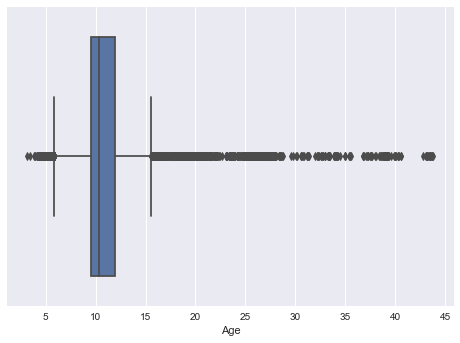

In [166]:
#Converting age to float
data['Age']=data['Age'].astype(float)
#Detecting outliers using boxplot for numerical variables
sns.boxplot(data['Age'])

<AxesSubplot:xlabel='CycleTime_days'>

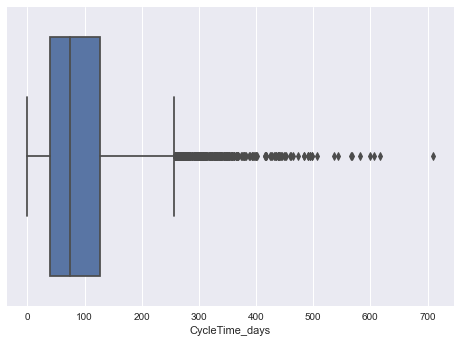

In [167]:
#Detecting outliers usibg boxplot for numerical variables
sns.boxplot(data['CycleTime_days'])

In [168]:
#Calculating outliers using IQR method- Age
q1_age=data['Age'].quantile(0.25)
q3_age=data['Age'].quantile(0.75)
iqr_age=q3_age-q1_age
res=((data['Age']) < (q1_age - 1.5 * iqr_age)) | (data['Age'] > (q3_age + 1.5 * iqr_age))
res.sum()

2222

In [169]:
#Calculating outliers using IQR method- Cycle time days
q1_ctd=data['CycleTime_days'].quantile(0.25)
q3_ctd=data['CycleTime_days'].quantile(0.75)
iqr_ctd=q3_ctd-q1_ctd
res1=((data['CycleTime_days']) < (q1_ctd - 1.5 * iqr_ctd)) | (data['CycleTime_days'] > (q3_ctd + 1.5 * iqr_ctd))
res1.sum()

342

In [170]:
# Calculating and removing outliers using z score
from scipy import stats
data['Age']=data['Age'].astype(float)
z=np.abs(stats.zscore(data['Age']))
threshold=3
print(np.where(z>3))
data=data[(z<3)]
print(data)
z2=np.abs(stats.zscore(data['CycleTime_days']))
print(np.where(z2>3))
data=data[(z2< 3)]
print(data)

(array([  41,  101,  134,  213,  215,  224,  236,  260,  265,  338,  406,
        566,  568,  584,  617,  772,  812,  864,  870,  951, 1029, 1090,
       1096, 1217, 1240, 1272, 1294, 1375, 1406, 1438, 1499, 1582, 1662,
       1669, 1687, 1701, 1765, 1788, 1793, 2017, 2069, 2101, 2129, 2243,
       2361, 2558, 2682, 2733, 2742, 2904, 3097, 3103, 3169, 3331, 3341,
       3580, 3596, 3671, 3708, 3711, 3791, 3908, 3919, 3939, 3945, 4038,
       4087, 4149, 4150, 4159, 4202, 4213, 4260, 4312, 4361, 4461, 4480,
       4487, 4749, 4752, 4853, 4872, 4876, 4938, 5115, 5129, 5140, 5182,
       5187, 5323, 5367, 5391, 5392, 5433, 5746, 6081, 6222, 6252, 6266,
       6267, 6491, 6492, 6493, 6518, 6584, 6613, 6690, 6698, 6713, 6816,
       6832, 6847, 6848, 6940, 6955, 7194, 7215, 7237]),)
     ShopRecordID ArrivalDate    Age  ShopID  IsHeavy CarModelID CommodityID  \
0               1  2017-06-27   8.49  471553        1     292204      477991   
1               2  2017-10-10   7.86  471554       

Text(0.5, 1.0, 'Heatmap of correlation')

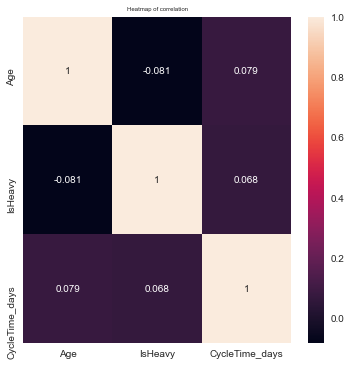

In [171]:
#Heatmap- Multicollinearity check
corr_matrix=data.corr(method ='pearson')
fig, ax = plt.subplots(figsize=(6,6))
heatmap = sns.heatmap(data=corr_matrix, annot=True, ax=ax)
heatmap.set_title('Heatmap of correlation', fontdict={'fontsize':6},pad=6)

In [172]:
#Converting variables to dummy type (categories)
df_shopid = pd.get_dummies(data['ShopID'])
df_comid = pd.get_dummies(data['CommodityID'])
df_carid = pd.get_dummies(data['CarModelID'])
data = pd.concat([data, df_shopid, df_comid, df_carid], axis = 1)

In [173]:
#Dropping original columns
data=data.drop(columns = ['ShopID', 'CarModelID', 'CommodityID'], axis=1)

In [174]:
data

,ShopRecordID,ArrivalDate,Age,IsHeavy,DateCompleted,CycleTime_days,471553,471554,471555,471556,...,292222,292223,292224,292225,292226,292227,292228,292229,292230,292231
0,1,2017-06-27,8.49,1,2018-01-02,189.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2017-10-10,7.86,1,2018-02-24,137.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2017-10-10,4.32,0,2018-01-24,106.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2017-10-04,10.10,0,2018-06-15,254.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,2017-10-18,9.64,1,2018-02-16,121.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,7260,2019-08-29,9.83,0,2019-10-31,63.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7260,7261,2019-11-18,10.72,0,2019-12-17,29.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7261,7262,2019-11-09,9.97,0,2019-12-31,52.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7262,7263,2019-11-15,19.05,0,2019-12-19,34.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [175]:
#Splitting the data into train and test sets- before and after 1st June 2019
train_data = data[data['DateCompleted'] < '2019-06-01']

In [176]:
#print
train_data

,ShopRecordID,ArrivalDate,Age,IsHeavy,DateCompleted,CycleTime_days,471553,471554,471555,471556,...,292222,292223,292224,292225,292226,292227,292228,292229,292230,292231
0,1,2017-06-27,8.49,1,2018-01-02,189.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2017-10-10,7.86,1,2018-02-24,137.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2017-10-10,4.32,0,2018-01-24,106.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2017-10-04,10.10,0,2018-06-15,254.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,2017-10-18,9.64,1,2018-02-16,121.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,7224,2019-02-01,10.59,1,2019-04-19,77.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7225,7226,2019-01-28,11.00,1,2019-04-09,71.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7227,7228,2019-01-21,10.06,0,2019-04-24,93.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7228,7229,2019-01-29,9.24,1,2019-03-29,59.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
#Check
train_data['DateCompleted'].max()

Timestamp('2019-05-31 00:00:00')

In [178]:
#Creating test data
test_data = data[data['DateCompleted'] > '2019-05-31']

In [179]:
#Check
test_data['DateCompleted'].min()

Timestamp('2019-06-02 00:00:00')

In [180]:
#check
test_data['DateCompleted'].max()

Timestamp('2019-12-31 00:00:00')

In [181]:
#print
test_data

,ShopRecordID,ArrivalDate,Age,IsHeavy,DateCompleted,CycleTime_days,471553,471554,471555,471556,...,292222,292223,292224,292225,292226,292227,292228,292229,292230,292231
22,23,2018-11-05,6.75,0,2019-09-29,328.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,47,2018-08-21,12.56,0,2019-06-17,300.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
48,49,2018-08-28,7.93,0,2019-06-07,283.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
52,53,2018-12-18,26.31,0,2019-11-01,318.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,56,2018-12-13,19.96,1,2019-06-27,196.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,7260,2019-08-29,9.83,0,2019-10-31,63.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7260,7261,2019-11-18,10.72,0,2019-12-17,29.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7261,7262,2019-11-09,9.97,0,2019-12-31,52.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7262,7263,2019-11-15,19.05,0,2019-12-19,34.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [182]:
train_data.shape

(5102, 380)

In [183]:
train_data = train_data.drop(columns = ['ShopRecordID', 'ArrivalDate', 'DateCompleted'])
test_data = test_data.drop(columns = ['ShopRecordID', 'ArrivalDate', 'DateCompleted'])

In [184]:
train_data

,Age,IsHeavy,CycleTime_days,471553,471554,471555,471556,471557,471558,471559,...,292222,292223,292224,292225,292226,292227,292228,292229,292230,292231
0,8.49,1,189.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.86,1,137.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.32,0,106.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.10,0,254.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.64,1,121.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,10.59,1,77.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7225,11.00,1,71.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7227,10.06,0,93.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7228,9.24,1,59.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
train_data.shape

(5102, 377)

In [186]:
test_data.shape

(1919, 377)

In [187]:
#Creating X and Y variables
#y-variable (target)
train_target = train_data['CycleTime_days']
test_target = test_data['CycleTime_days']

In [188]:
train_data.drop(columns = ['CycleTime_days'], inplace = True)
test_data.drop(columns = ['CycleTime_days'], inplace = True)

In [189]:
train_data

,Age,IsHeavy,471553,471554,471555,471556,471557,471558,471559,471560,...,292222,292223,292224,292225,292226,292227,292228,292229,292230,292231
0,8.49,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.86,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.32,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.10,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.64,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,10.59,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7225,11.00,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7227,10.06,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7228,9.24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
train_data.shape

(5102, 376)

In [191]:
test_data

,Age,IsHeavy,471553,471554,471555,471556,471557,471558,471559,471560,...,292222,292223,292224,292225,292226,292227,292228,292229,292230,292231
22,6.75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,12.56,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,7.93,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,26.31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,19.96,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,9.83,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7260,10.72,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7261,9.97,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7262,19.05,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [192]:
#Scaling numerical variable- Age
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [193]:
sc.fit(np.array(train_data['Age']).reshape(-1, 1))
train_data['Age'] = sc.transform(np.array(train_data['Age']).reshape(-1, 1))

In [194]:
train_data

,Age,IsHeavy,471553,471554,471555,471556,471557,471558,471559,471560,...,292222,292223,292224,292225,292226,292227,292228,292229,292230,292231
0,-0.566030,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.699217,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.447600,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.225664,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.322911,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,-0.122074,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7225,-0.035397,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7227,-0.234120,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7228,-0.407474,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
test_data['Age'] = sc.transform(np.array(test_data['Age']).reshape(-1, 1))

In [196]:
test_data

,Age,IsHeavy,471553,471554,471555,471556,471557,471558,471559,471560,...,292222,292223,292224,292225,292226,292227,292228,292229,292230,292231
22,-0.933880,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0.294399,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,-0.684419,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,3.201255,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,1.858816,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,-0.282744,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7260,-0.094591,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7261,-0.253147,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7262,1.666435,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [197]:
train_data

,Age,IsHeavy,471553,471554,471555,471556,471557,471558,471559,471560,...,292222,292223,292224,292225,292226,292227,292228,292229,292230,292231
0,-0.566030,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.699217,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.447600,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.225664,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.322911,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,-0.122074,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7225,-0.035397,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7227,-0.234120,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7228,-0.407474,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor
rregressor = RandomForestRegressor(n_estimators=300, random_state=0)
rregressor.fit(train_data, train_target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [199]:
#Predicting using the model
y_pred3 = rregressor.predict(test_data)

In [200]:
#Calculating performance metrics- RMSE
import math

 
MSE = np.square(np.subtract(test_target,y_pred3)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

64.0343634633195


In [201]:
#MAE calculation
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(test_target,y_pred3)
print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

45.96922717107573


In [202]:
#Average cycle time from data
avg_ctd_original=data['CycleTime_days'].mean()
avg_ctd_original

89.18458908987324

In [203]:
#Average cycle time predicted
avg_ctd_predicted=np.mean(y_pred3)
avg_ctd_predicted

80.25906539603471

In [204]:
#Average cycle time original
avg_test=test_target.mean()
avg_test

96.75143303804064